In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
jobs = pd.read_csv("jobs.csv")

New Technologies column for description

In [4]:
# Extracting Tech form job DESCRIPTION and making new columns based on that:
def check_technology_presence(description, technology):
    return 1 if technology in description.lower() else 0

# Create individual columns for each technology
jobs['Python'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'python'))
jobs['R'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, ' r '))
jobs['SAS'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'sas'))
jobs['SQL'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'sql'))
jobs['Excel'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'excel'))
jobs['Power BI'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'powerbi') or check_technology_presence(x, 'power bi') 
                                                 or check_technology_presence(x, 'power-bi'))
jobs['Tableau'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'tableau'))
jobs['Software Tech'] = jobs['Job Description'].apply(lambda x: check_technology_presence(x, 'java') or check_technology_presence(x, 'c++')
                                                       or check_technology_presence(x, 'c#') or check_technology_presence(x, ' c '))
jobs['Data Engineering Tech'] = jobs['Job Description'].apply(
    lambda x: check_technology_presence(x, 'mongodb') or check_technology_presence(x, 'spark') or check_technology_presence(x, 'amazon redshift') 
    or check_technology_presence(x, 'snowflake') )


Sector Groupping

In [5]:
# Define the logical groupings for the sectors again
sector_groupings = {
    "Information Technology": "Information Technology",
    "Telecommunications": "Information Technology",
    
    "Insurance": "Financial & Legal Services",
    "Finance": "Financial & Legal Services",
    "Accounting & Legal": "Financial & Legal Services",
    "Real Estate": "Financial & Legal Services",
    
    "Business Services": "Consumer Services & Retail",
    "Restaurants, Bars & Food Services": "Consumer Services & Retail",
    "Retail": "Consumer Services & Retail",
    "Consumer Services": "Consumer Services & Retail",
    
    "Health Care": "Health & Pharmaceuticals",
    "Biotech & Pharmaceuticals": "Health & Pharmaceuticals",
    
    "Oil, Gas, Energy & Utilities": "Energy & Mining",
    "Mining & Metals": "Energy & Mining",
    
    "Government": "Public & Non-Profit",
    "Non-Profit": "Public & Non-Profit",
    "Education": "Public & Non-Profit",
    
    "Manufacturing": "Manufacturing & Construction",
    "Aerospace & Defense": "Manufacturing & Construction",
    "Construction, Repair & Maintenance": "Manufacturing & Construction",
    
    "Agriculture & Forestry": "Agriculture",
    
    
    "Entertainment & Media": "Entertainment, Arts & Tourism",
    "Travel & Tourism": "Entertainment, Arts & Tourism",
    "Media": "Entertainment & Media",
    
    "Transportation & Logistics": "Transportation & Logistics",
    
    "Unknown": "Others"
}

# Map the sectors to their respective groups
jobs['Sector_Grouped'] = jobs['Sector'].map(sector_groupings)

# Display the first few rows of the dataframe to verify the changes
jobs['Sector_Grouped'].unique()


array(['Information Technology', 'Financial & Legal Services', nan,
       'Consumer Services & Retail', 'Entertainment & Media',
       'Public & Non-Profit', 'Health & Pharmaceuticals',
       'Energy & Mining', 'Manufacturing & Construction', 'Agriculture',
       'Entertainment, Arts & Tourism', 'Transportation & Logistics'],
      dtype=object)

In [6]:
jobs.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Easy Apply', 'degree', 'State',
       'Salary_Estimate', 'mean_salary', 'Salary_cat', 'General_Title',
       'Python', 'R', 'SAS', 'SQL', 'Excel', 'Power BI', 'Tableau',
       'Software Tech', 'Data Engineering Tech', 'Sector_Grouped'],
      dtype='object')

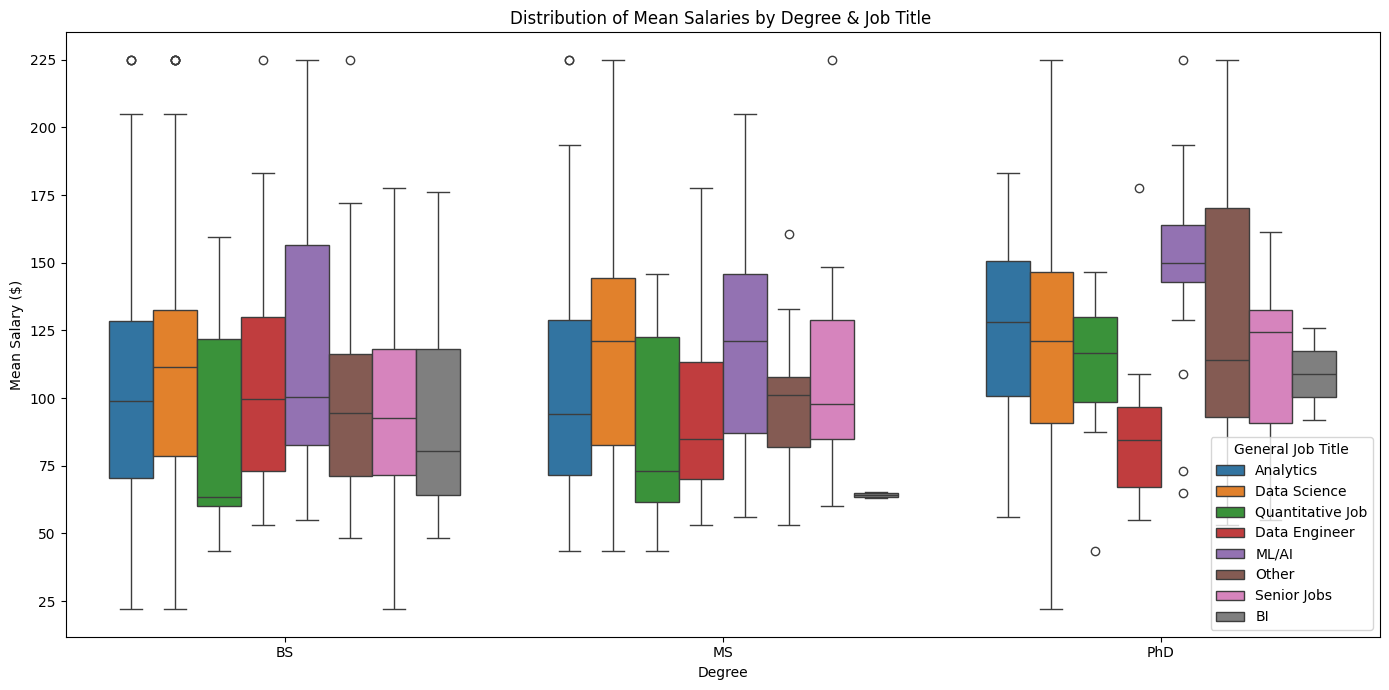

<Figure size 640x480 with 0 Axes>

In [7]:
# Filtering out the "Other" category from the General_Title column

# Creating the box plot for the filtered data
plt.figure(figsize=(14, 7))
sns.boxplot(data=jobs, x="degree", y="mean_salary", hue="General_Title")

plt.title("Distribution of Mean Salaries by Degree & Job Title ")
plt.ylabel("Mean Salary ($)")
plt.xlabel("Degree")
plt.legend(title="General Job Title")
plt.tight_layout()

plt.show()
plt.savefig("my_plot.png")


In [8]:

# Conducting two-way ANOVA
model = ols('mean_salary ~ C(degree) + C(General_Title) + C(degree):C(General_Title)', data=jobs).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # type 2 ANOVA DataFrame

anova_table

,sum_sq,df,F,PR(>F)
C(degree),2.655280e+04,2.0,9.008533,1.261289e-04
C(General_Title),9.125295e+04,7.0,8.845503,8.425760e-11
C(degree):C(General_Title),3.944281e+04,14.0,1.911673,2.112058e-02
Residual,3.926092e+06,2664.0,NaN,NaN


Degree's Influence on Salary: There's a statistically significant difference in average salaries based on the educational degree someone holds. Simply put, the level of education (e.g., BS, MS, PhD) can impact one's salary.

Job Title's Influence on Salary: Different job titles or roles also show statistically significant differences in average salaries. This means the type of job someone has plays a role in determining their salary.

Interaction between Degree and Job Title: The interaction between the educational degree and job title is also statistically significant. This implies that the influence of one's degree on their salary might vary depending on the job title they hold, and vice versa.

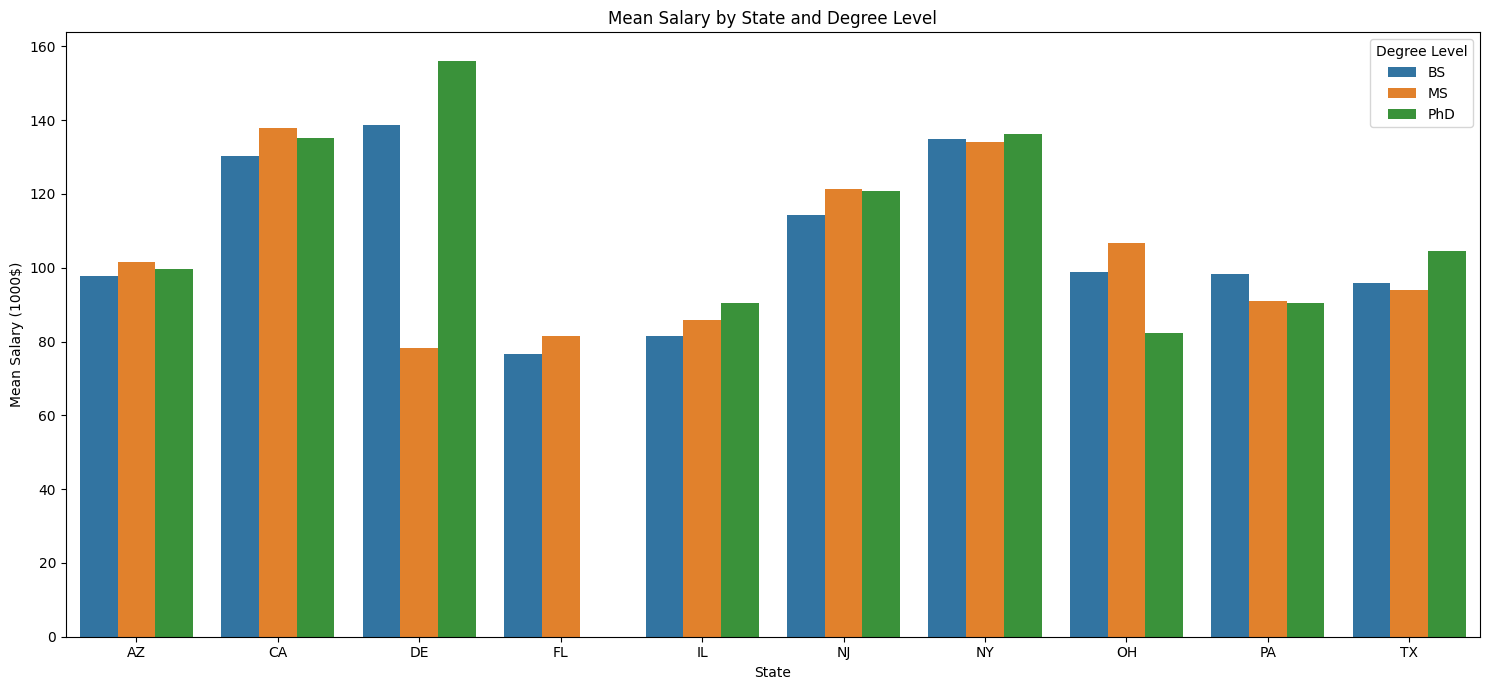

In [9]:
# Grouping by State and Degree and calculating the mean salary
mean_salaries = jobs.groupby(['State', 'degree'])['mean_salary'].mean().reset_index()

# Plotting the mean salary by State and Degree
plt.figure(figsize=(15, 7))
sns.barplot(data=mean_salaries, x="State", y="mean_salary", hue="degree")

plt.title("Mean Salary by State and Degree Level")
plt.ylabel("Mean Salary (1000$)")
plt.xlabel("State")
plt.legend(title="Degree Level")
plt.tight_layout()

plt.show()

In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Conducting two-way ANOVA with State and Degree as factors
model_state_degree = ols('mean_salary ~ C(State) + C(degree) + C(State):C(degree)', data=jobs).fit()
anova_table_state_degree = sm.stats.anova_lm(model_state_degree, typ=2)  # type 2 ANOVA DataFrame

anova_table_state_degree

c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 8
  warnings.warn('covariance of constraints does not have full '
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
c:\Users\ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 18, but rank is 17
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(State),1.090148e+06,9.0,105.614431,2.652959e-153
C(degree),1.632318e+02,2.0,0.071163,7.896715e-01
C(State):C(degree),3.536108e+04,18.0,1.712904,3.413489e-02
Residual,3.049567e+06,2659.0,NaN,NaN


State's Influence on Salary: There's a statistically significant difference in average salaries among different states. This means that the state in which a job is located plays a crucial role in determining the salary.

Degree's Influence on Salary within States: Within individual states, there isn't a statistically significant difference in average salaries based on the educational degree one holds. So, Within a particular state, holding different educational degrees (BS, MS, PhD) doesn't necessarily mean one would earn a significantly different salary.

Interaction between State and Degree: The relationship between the state and degree is statistically significant, indicating an interaction effect. This suggests that the impact of one's educational degree on salary might vary depending on the state they are in, and the influence of the state on salary might differ based on the educational degree held.

Sector Aalysis:

C:\Users\ahmed\AppData\Local\Temp\ipykernel_22820\579265790.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_counts_sector, y="Sector", x="Job_Count", palette="viridis", order=job_counts_sector['Sector'])


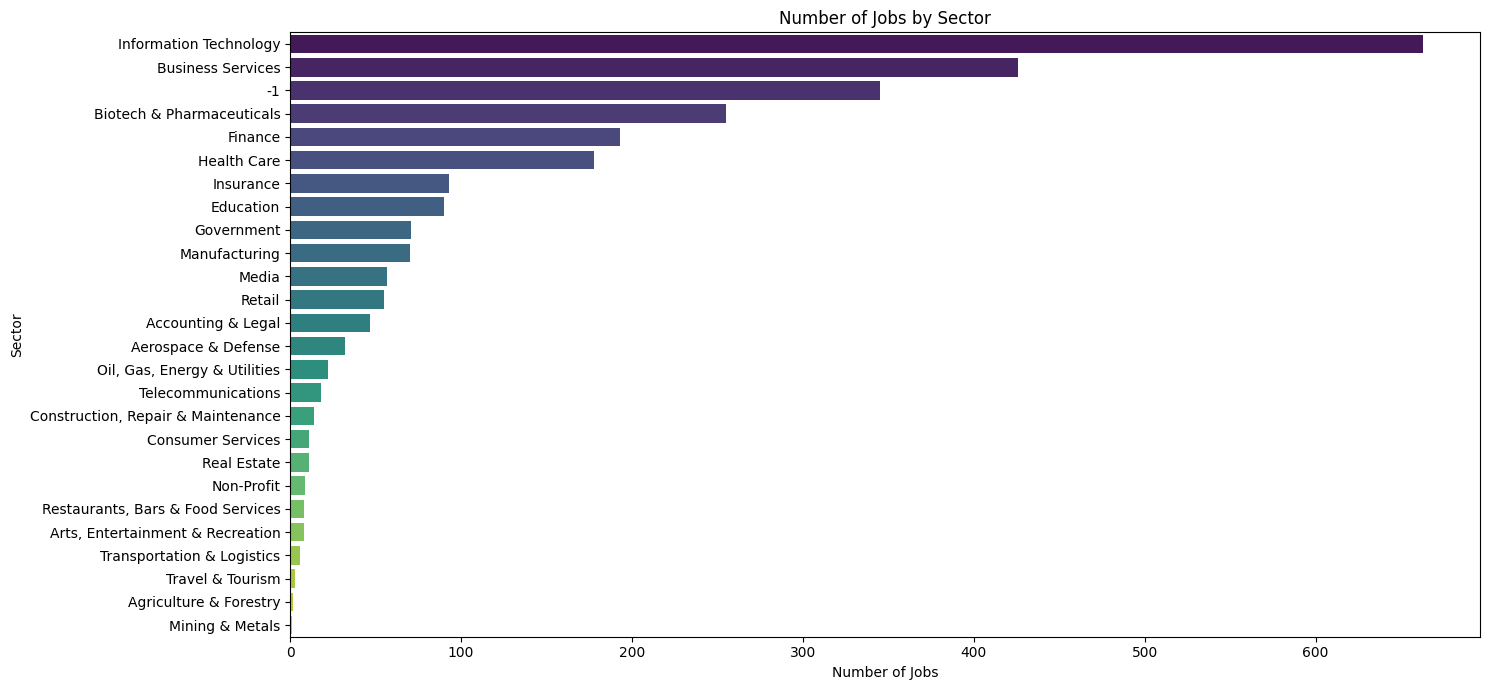

In [11]:
# Counting the number of jobs in each sector
job_counts_sector = jobs['Sector'].value_counts().reset_index()
job_counts_sector.columns = ['Sector', 'Job_Count']

# Plotting the number of jobs by sector
plt.figure(figsize=(15, 7))
sns.barplot(data=job_counts_sector, y="Sector", x="Job_Count", palette="viridis", order=job_counts_sector['Sector'])
plt.title("Number of Jobs by Sector")
plt.xlabel("Number of Jobs")
plt.ylabel("Sector")
plt.tight_layout()

plt.show()


C:\Users\ahmed\AppData\Local\Temp\ipykernel_22820\1063783546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_salaries_sector, y="Sector", x="mean_salary", palette="viridis")


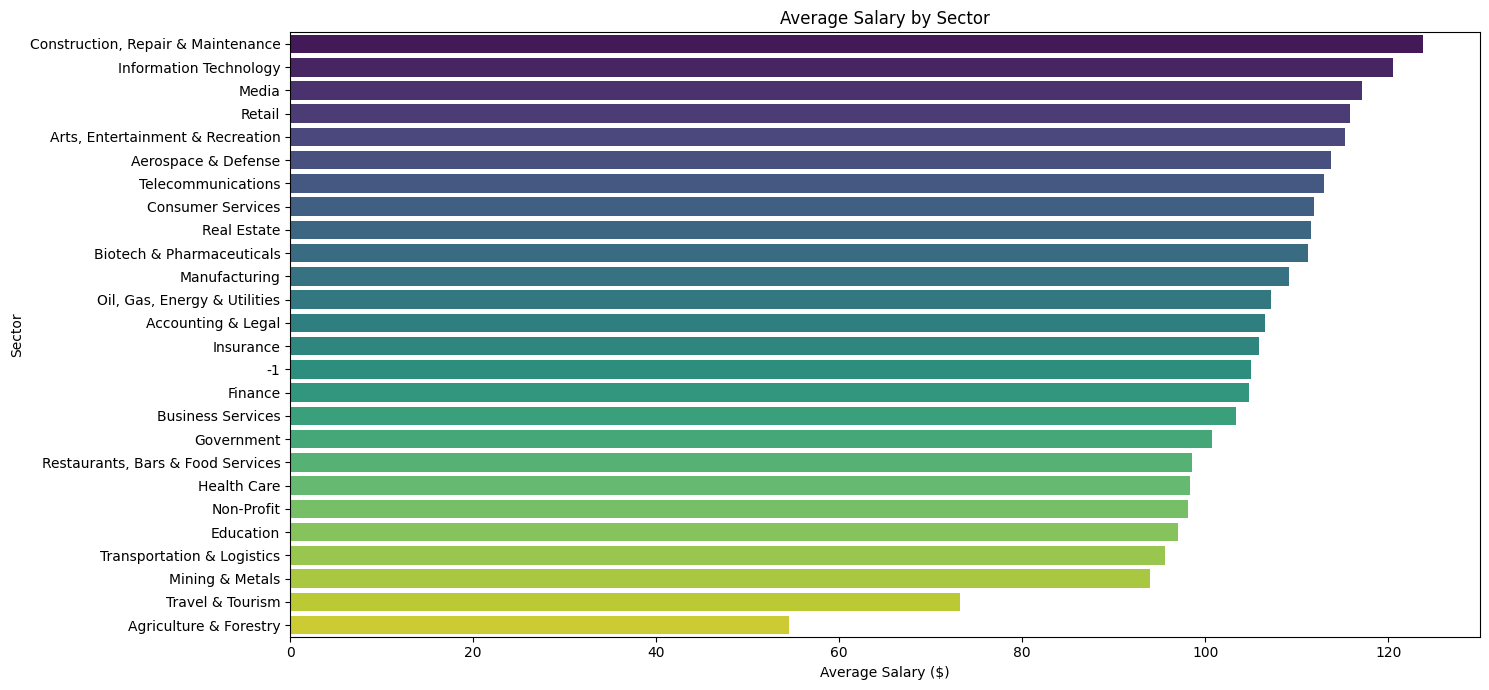

In [12]:
# Calculating the mean salary for each sector
mean_salaries_sector = jobs.groupby('Sector')['mean_salary'].mean().reset_index().sort_values(by='mean_salary', ascending=False)

# Plotting the average salary by sector
plt.figure(figsize=(15, 7))
sns.barplot(data=mean_salaries_sector, y="Sector", x="mean_salary", palette="viridis")
plt.title("Average Salary by Sector")
plt.xlabel("Average Salary ($)")
plt.ylabel("Sector")
plt.tight_layout()

plt.show()


In [13]:
model = ols('mean_salary ~ C(Sector_Grouped)', data=jobs).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Sector_Grouped),1.377495e+05,10.0,9.225067,4.031539e-15
Residual,3.470216e+06,2324.0,NaN,NaN


Given the high F-value and the extremely low P-value, we can conclude that there are statistically significant differences in the mean salaries across the different sector groupings. This indicates that the sector a job belongs to can have a significant impact on its mean salary

In [14]:
# Check for NaN values in the 'Sector_Grouped' column
nan_sectors = jobs[jobs['Sector_Grouped'].isna()]

# If there are any NaN values, fill them with a placeholder value
if not nan_sectors.empty:
    jobs['Sector_Grouped'].fillna("Ungrouped", inplace=True)

# Conduct the Tukey's HSD test again
tukey_results = pairwise_tukeyhsd(endog=jobs['mean_salary'], groups=jobs['Sector_Grouped'], alpha=0.05)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

tukey_df.

SyntaxError: invalid syntax (3331507007.py, line 14)

## New Analysis to include

In [15]:
tech_columns = ['Python', 'R', 'SAS', 'SQL', 'Excel', 'Power BI', 'Tableau','Software Tech','Data Engineering Tech']
tech_data = jobs[tech_columns]

tech_counts = tech_data.sum().sort_values(ascending=False)

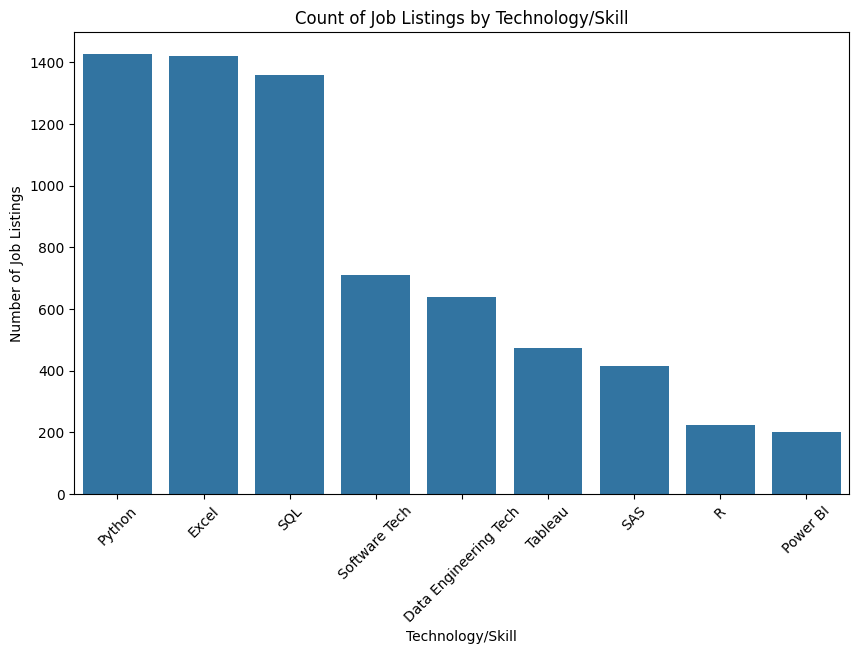

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=tech_counts.index, y=tech_counts.values)
plt.title('Count of Job Listings by Technology/Skill')
plt.ylabel('Number of Job Listings')
plt.xlabel('Technology/Skill')
plt.xticks(rotation=45)
plt.show()

In [17]:
tech_counts_table = tech_counts.reset_index()
tech_counts_table.columns = ['Technology/Skill', 'Count']
tech_counts_table

,Technology/Skill,Count
0,Python,1426
1,Excel,1420
2,SQL,1360
3,Software Tech,711
4,Data Engineering Tech,640
5,Tableau,475
6,SAS,414
7,R,224
8,Power BI,200


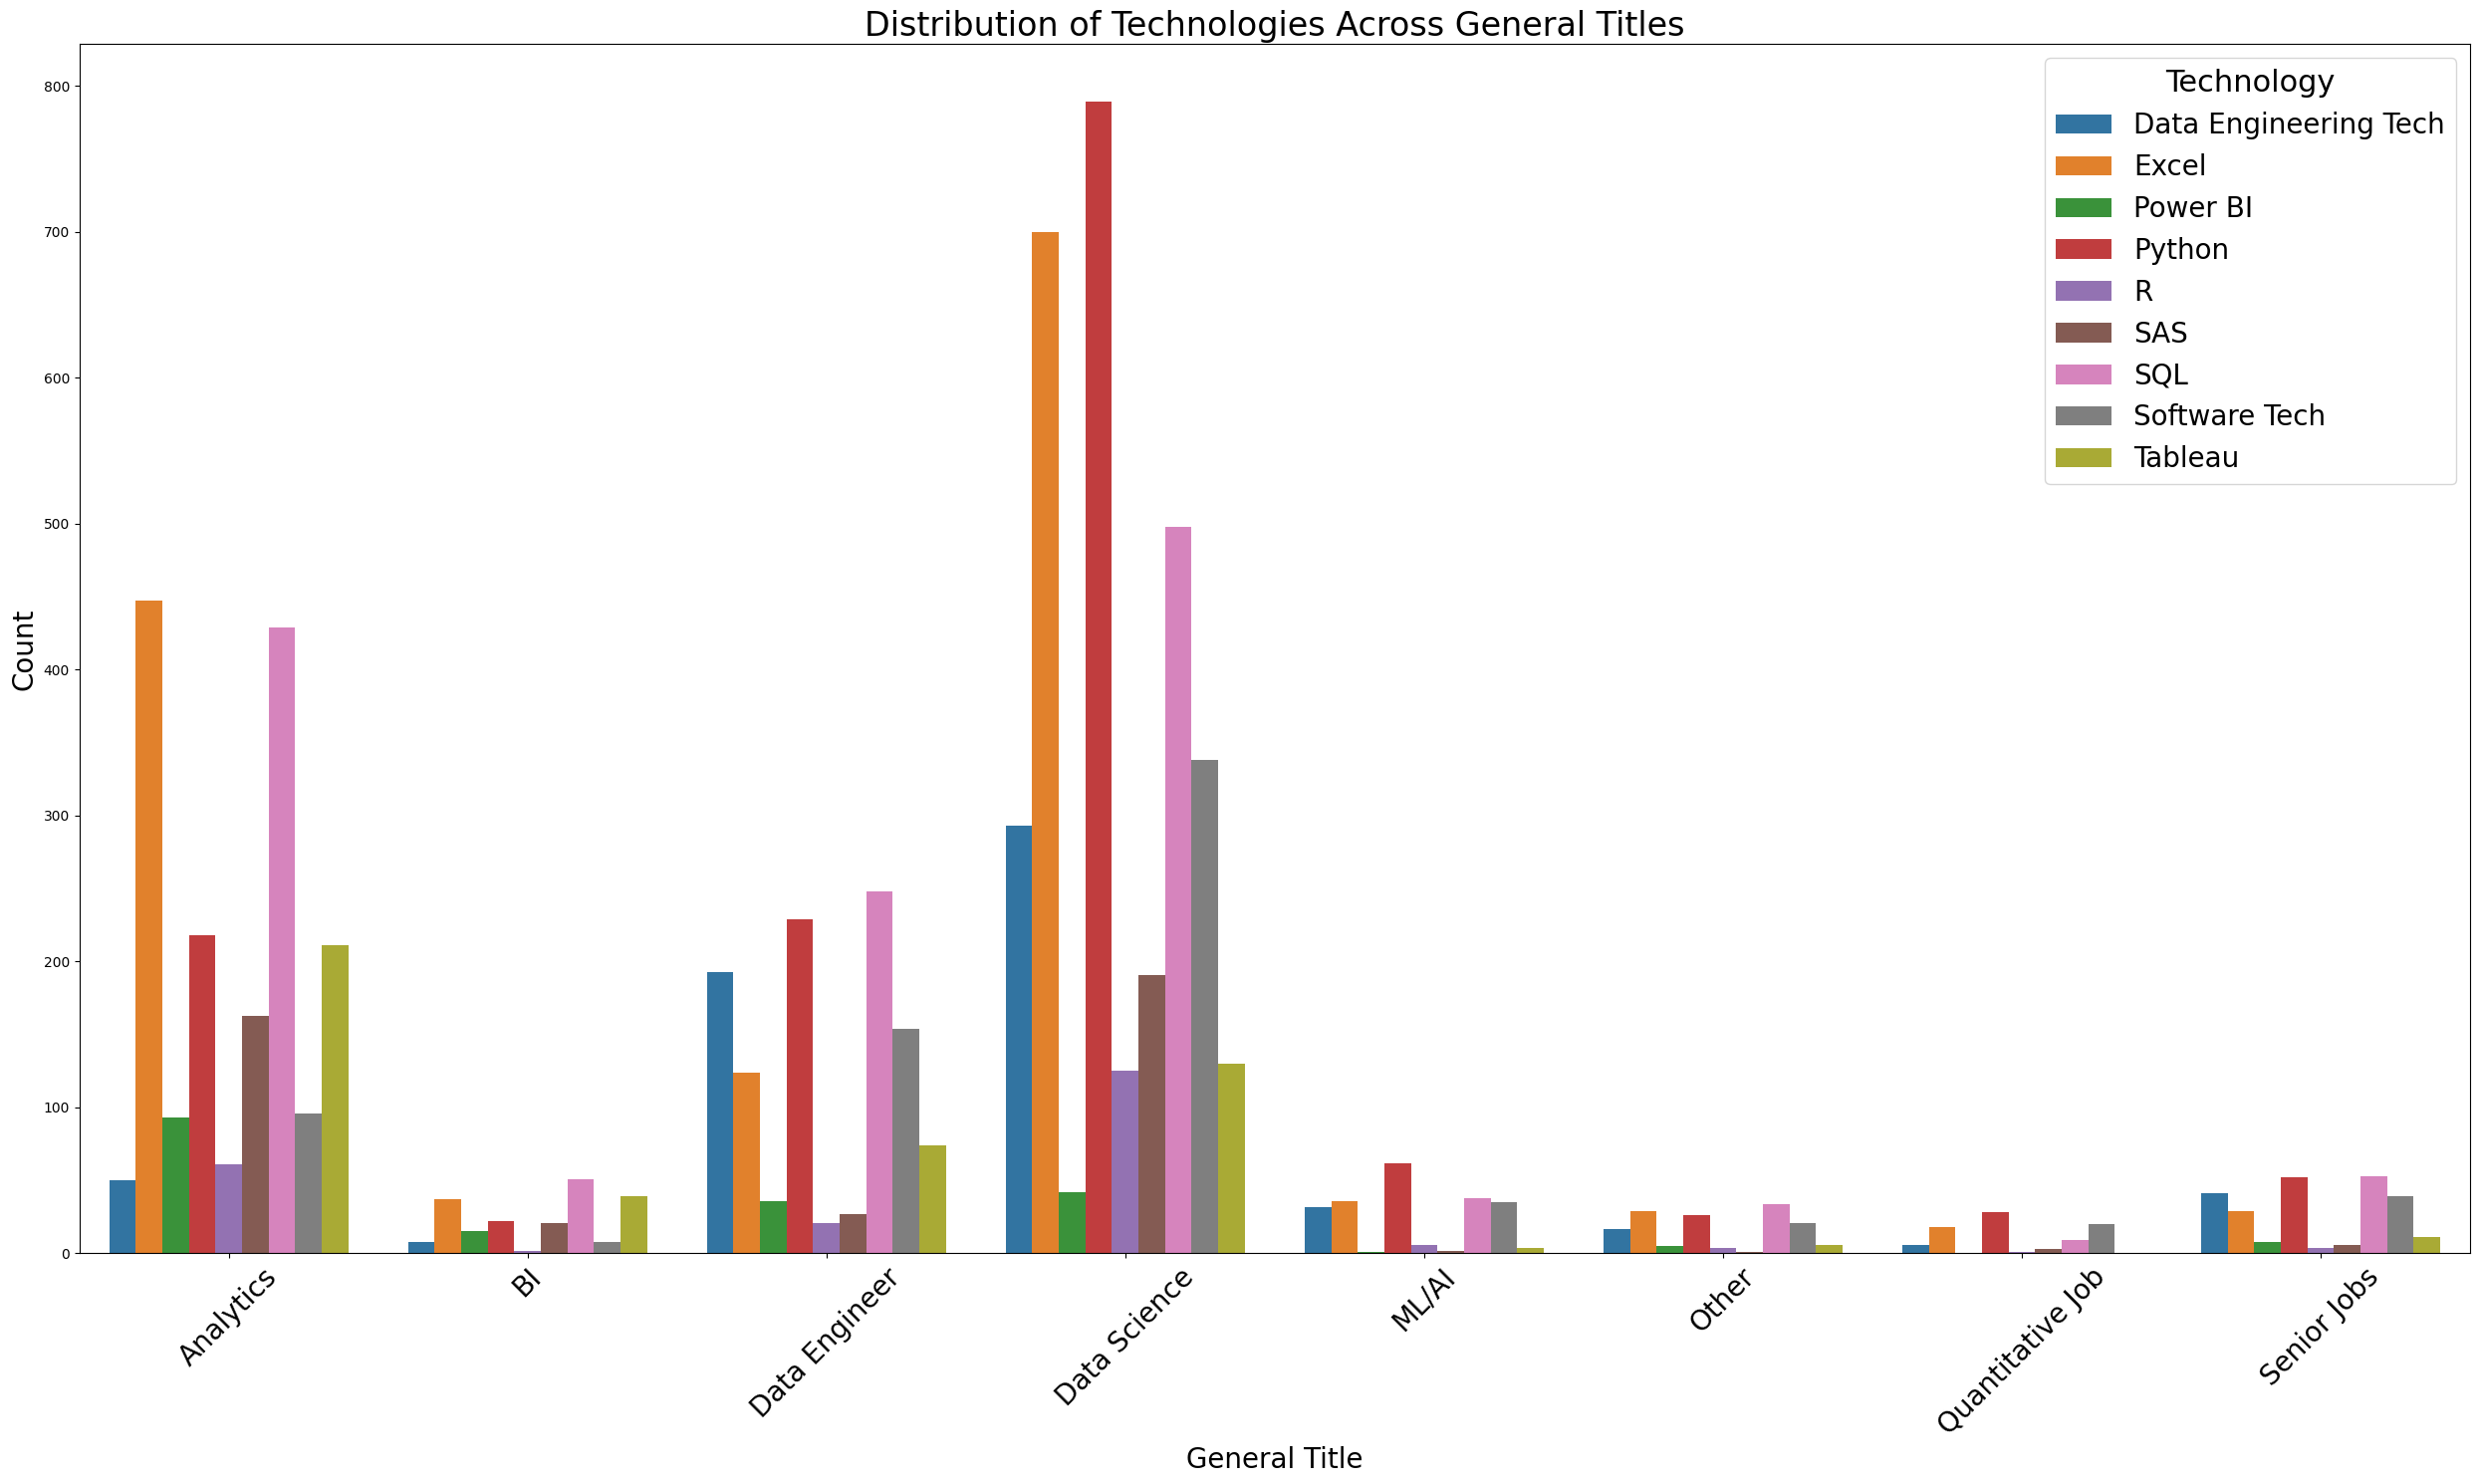

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of technology columns
tech_columns = ['Python', 'R', 'SAS', 'SQL', 'Excel', 'Power BI', 'Tableau', 'Software Tech', 'Data Engineering Tech']

# Melt the DataFrame
melted_jobs = jobs.melt(id_vars=['General_Title'], value_vars=tech_columns, var_name='Technology', value_name='Presence')

# Filter out rows where the technology is not present
filtered_melted_jobs = melted_jobs[melted_jobs['Presence'] == 1]

# Group and count
grouped_data = filtered_melted_jobs.groupby(['General_Title', 'Technology']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(25, 15))
sns.barplot(x='General_Title', y='Count', hue='Technology', data=grouped_data)

# Increase the font size of x-axis labels
plt.xticks(rotation=45, fontsize=20)

plt.title('Distribution of Technologies Across General Titles', fontsize=24)
plt.xlabel('General Title', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Adjust the legend with larger font sizes and reposition it closer to the plot
plt.legend(title='Technology', loc='upper right', fontsize=20, title_fontsize=22)

plt.tight_layout()
plt.show()


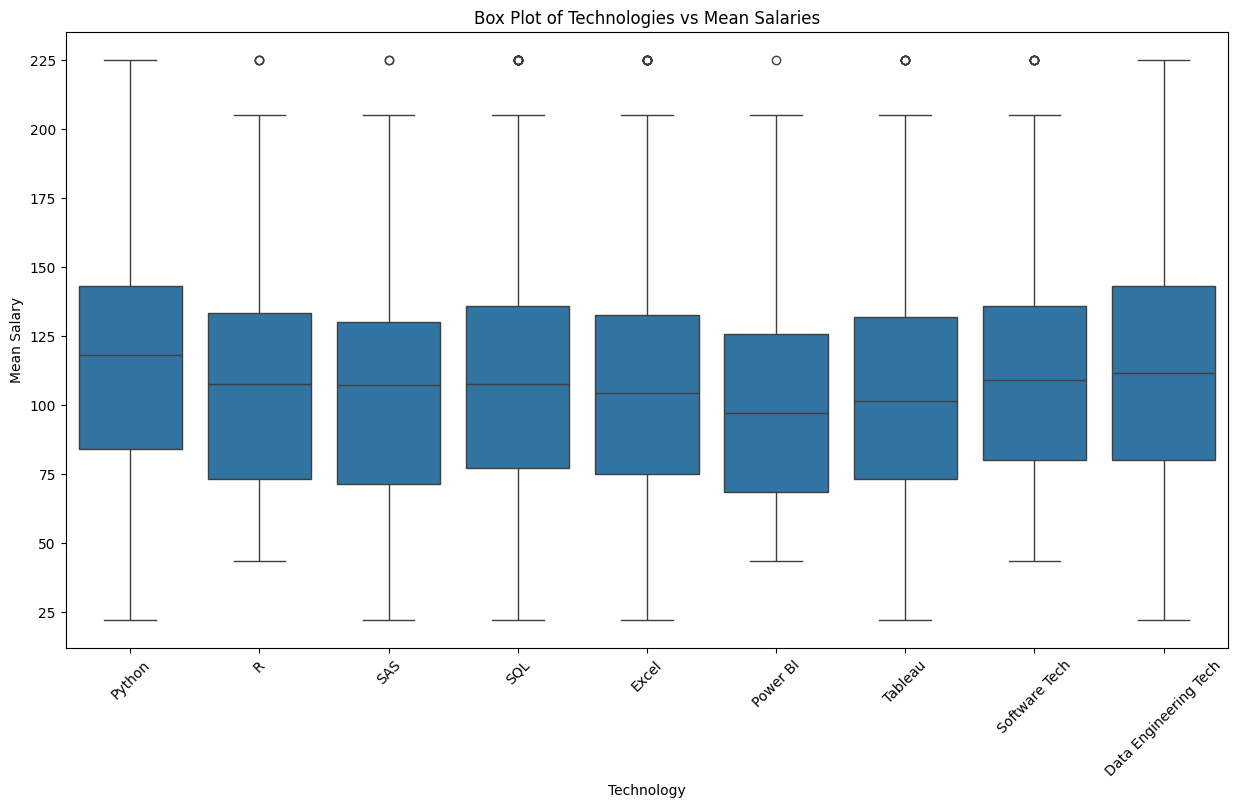

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#tech_columns = ['Python', 'R', 'SAS', 'SQL', 'Excel', 'Power BI', 'Tableau', 'Software Tech', 'Data Engineering Tech']

# Melt the DataFrame
melted_jobs_with_salary = jobs.melt(id_vars=['mean_salary'], value_vars=tech_columns, var_name='Technology', value_name='Presence')

# Filter out rows where the technology is not present
present_tech_jobs = melted_jobs_with_salary[melted_jobs_with_salary['Presence'] == 1]

# Create the box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='Technology', y='mean_salary', data=present_tech_jobs)
plt.xticks(rotation=45)
plt.title('Box Plot of Technologies vs Mean Salaries')
plt.xlabel('Technology')
plt.ylabel('Mean Salary')
plt.show()


In [ ]:
#tech_columns = ['Python', 'R', 'SAS', 'SQL', 'Excel', 'Power BI', 'Tableau', 'Software Tech', 'Data Engineering Tech']

# Melt the DataFrame
melted_jobs_for_anova = jobs.melt(id_vars=['mean_salary'], value_vars=tech_columns, var_name='Technology', value_name='Presence')

# Filter out rows where the technology is not present
present_tech_jobs_for_anova = melted_jobs_for_anova[melted_jobs_for_anova['Presence'] == 1]

# Conducting one-way ANOVA
model = ols('mean_salary ~ C(Technology)', data=present_tech_jobs_for_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Output the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(Technology),6.934520e+04,8.0,5.721812,2.779528e-07
Residual,1.039394e+07,6861.0,NaN,NaN


Technology's Influence on Salary:

There's a statistically significant difference in average salaries among different technologies. This means that the specific technology expertise required for a job is a crucial factor in determining its salary. Different technologies are associated with distinct salary ranges, highlighting the importance of technical skills in salary determination.

In [ ]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

# Assuming 'present_tech_jobs_for_anova' is your DataFrame
python_salaries = present_tech_jobs_for_anova[present_tech_jobs_for_anova['Technology'] == 'Python']['mean_salary']
tech_results = []

# Loop through each technology and compare with Python
for tech in present_tech_jobs_for_anova['Technology'].unique():
    if tech != 'Python':
        other_tech_salaries = present_tech_jobs_for_anova[present_tech_jobs_for_anova['Technology'] == tech]['mean_salary']
        
        # Calculate the t-statistic and the p-value
        t_stat, p_val = ttest_ind(python_salaries, other_tech_salaries, equal_var=False)
        
        # Calculate the mean difference (Python - Other Tech)
        mean_diff = np.mean(python_salaries) - np.mean(other_tech_salaries)
        
        # Calculate the standard error and the confidence intervals
        se = np.sqrt(np.var(python_salaries)/len(python_salaries) + np.var(other_tech_salaries)/len(other_tech_salaries))
        conf_int = stats.norm.interval(0.95, loc=mean_diff, scale=se)
        
        # Append the results
        tech_results.append({
            'Comparison': f'Python vs {tech}',
            'Mean Difference': mean_diff,
            'P-Value': p_val,
            'Lower CI': conf_int[0],
            'Upper CI': conf_int[1]
        })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(tech_results)

# Extract just the p-values for adjustment
p_values = results_df['P-Value'].values
adjusted_p_values = multipletests(p_values, alpha=0.05, method='bonferroni')[1]

# Add the adjusted p-values to the DataFrame
results_df['Adjusted P-Value'] = adjusted_p_values

results_df

,Comparison,Mean Difference,P-Value,Lower CI,Upper CI,Adjusted P-Value
0,Python vs R,4.440277,0.121246,-1.148647,10.029201,0.969971
1,Python vs SAS,8.647694,0.000053,4.482785,12.812603,0.000428
2,Python vs SQL,4.086364,0.005723,1.191234,6.981494,0.045780
3,Python vs Excel,6.598621,0.000007,3.729036,9.468205,0.000055
4,Python vs Power BI,13.411438,0.000002,8.026621,18.796254,0.000015
5,Python vs Tableau,7.516964,0.000311,3.452640,11.581287,0.002487
6,Python vs Software Tech,3.431220,0.053284,-0.043664,6.906103,0.426268
7,Python vs Data Engineering Tech,1.352219,0.473008,-2.337533,5.041970,1.000000


* SQL: Python-related roles pay more on average than SQL roles, with a significant mean salary difference of $4,086.36.
* Excel: Python positions have a higher mean salary compared to Excel, with a mean difference of $6,598.62.
* SAS: Jobs requiring Python offer a significantly higher mean salary than those requiring SAS, with a mean difference of $8,647.69.
* Tableau: Python jobs also show a higher mean salary compared to those requiring Tableau, with a mean difference of $7,516.96.
* Power BI: There is a substantial mean salary advantage for Python over Power BI roles, indicated by a mean difference of $13,411.44.


For R, Software Technologies, or Data Engineering Technologies, the data does not provide sufficient evidence to conclude that there are true differences in average salaries for jobs requiring these technologies compared to those requiring Python.